In [1]:
import xlrd
import math
import numpy
from scipy.optimize import minimize
import matplotlib.pyplot as plt 

#Define SABR Function
def SABR(alpha,beta,rho,nu,F,K,time): # all variables are scalars
    if K <= 0:   # negative rates' problem, need to shift the smile
        return 0
    elif F == K:
        V = (F*K)**((1-beta)/2.)
        logFK = math.log(F/K)
        A = 1 + ( ((1-beta)**2*alpha**2)/(24.*(V**2)) + (alpha*beta*nu*rho)/(4.*V) + ((nu**2)*(2-3*(rho**2))/24.) ) * time
        B = 1 + (1/24.)*(((1-beta)*logFK)**2) + (1/1920.)*(((1-beta)*logFK)**4)
        return (alpha/V)*A
    elif F != K: 
        V = (F*K)**((1-beta)/2.)
        logFK = math.log(F/K)
        z = (nu/alpha)*V*logFK
        x = math.log( ( math.sqrt(1-2*rho*z+z**2) + z - rho ) / (1-rho) )
        A = 1 + ( ((1-beta)**2*alpha**2)/(24.*(V**2)) + (alpha*beta*nu*rho)/(4.*V) + ((nu**2)*(2-3*(rho**2))/24.) ) * time
        B = 1 + (1/24.)*(((1-beta)*logFK)**2) + (1/1920.)*(((1-beta)*logFK)**4)
        return (nu*logFK*A)/(x*B)



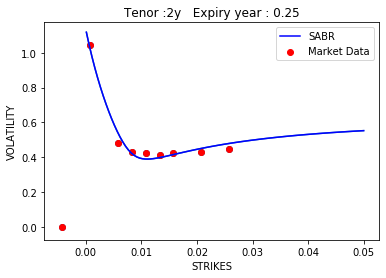

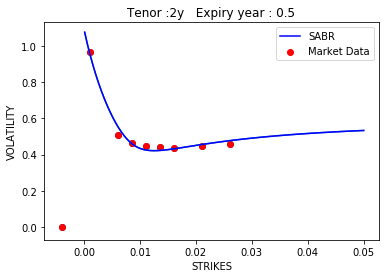

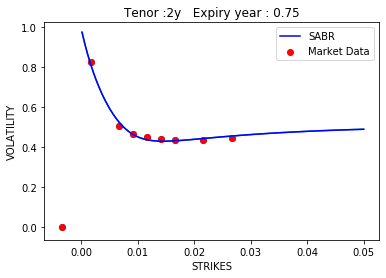

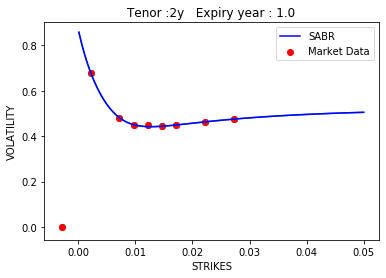

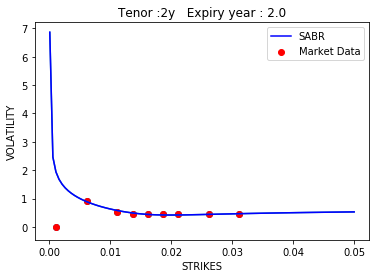

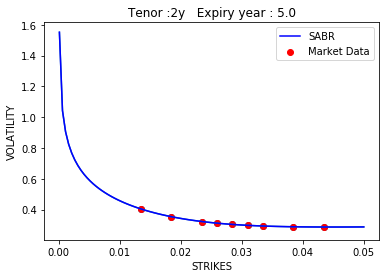

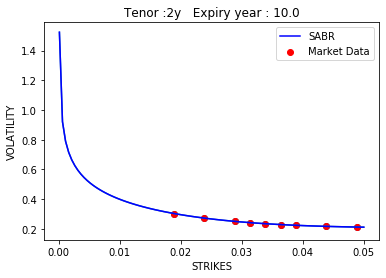

In [2]:
#############  Smiles for 2 years tenor  ######################

#import parameters, F and Expiry time
file = open("para.csv")
parameters = numpy.loadtxt(file, delimiter=";")
p2=numpy.zeros((7,15))
for i in range(0,7):
    p2[i]=parameters[i]
    
#Adding shift to to eliminate negative strikes    
shift=[0,0,0,0,0,0,0]
for i in range (7):
    if (p2[i][4]-0.015)<0:
        shift[i] = 0.001 - (p2[i][4]-0.015)
        
for j in range(0,7):
    #define the continuous functions SABR
    x2=numpy.linspace(0.0001,0.05,100)
    y2=[]
    for i in range(len(x2)):
        y2.append(SABR(p2[j][0],p2[j][1],p2[j][2],p2[j][3],p2[j][4],x2[i]+shift[j],p2[j][5]))
    #Import the market data to compare
    K2=p2[j][4]
    e2=[K2-0.015,K2-0.01,K2-0.005,K2-0.0025,K2,K2+0.0025,K2+0.005,K2+0.01,K2+0.015]
    f2=[p2[j][6],p2[j][7],p2[j][8],p2[j][9],p2[j][10],p2[j][11],p2[j][12],p2[j][13],p2[j][14]]
    
    #plot the function SABR + Market data
    fig,ax2= plt.subplots()
    ax2.plot(x2,y2)
    ax2 = plt.scatter(e2,f2)
    # Add title and axis names
    plt.title('Tenor :'+str(2)+'y   Expiry year : '+str(p2[j][5]))
    plt.xlabel('STRIKES')
    plt.ylabel('VOLATILITY')
    plt.plot(x2, y2, "blue", label="SABR")
    plt.scatter(e2,f2,color='r',label="Market Data")
    plt.legend()
    plt.show()
    
    

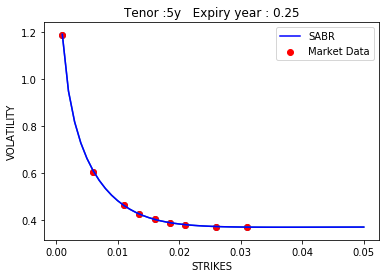

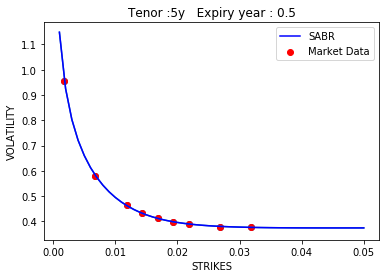

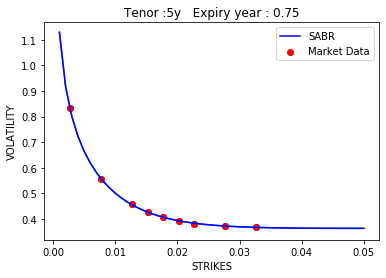

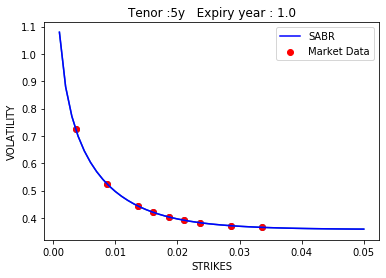

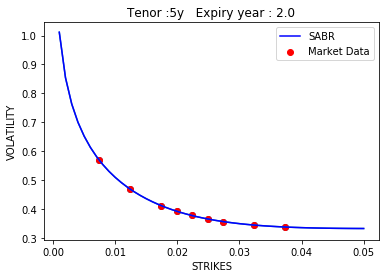

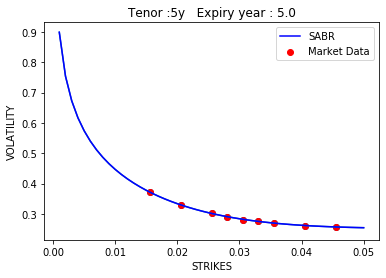

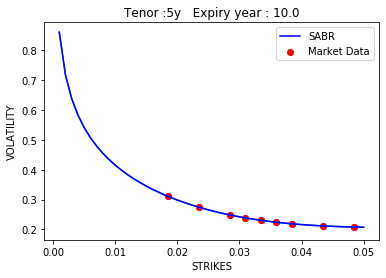

In [34]:
#############  Smiles for 5 years tenor  ######################

#import parameters, F and Expiry time
p5=numpy.zeros((7,15))
for i in range(7,14):
    p5[i-7]=parameters[i]

for j in range(0,7):  
    #define the continuous functions SABR
    x5=numpy.linspace(0.001,0.05)
    y5=[]
    for i in range(len(x5)):
        y5.append(SABR(p5[j][0],p5[j][1],p5[j][2],p5[j][3],p5[j][4],x5[i],p5[j][5]))
    #Import the market data to compare
    K5=p5[j][4]
    e5=[K5-0.015,K5-0.01,K5-0.005,K5-0.0025,K5,K5+0.0025,K5+0.005,K5+0.01,K5+0.015]
    f5=[p5[j][6],p5[j][7],p5[j][8],p5[j][9],p5[j][10],p5[j][11],p5[j][12],p5[j][13],p5[j][14]]
    
    #plot the function SABR + Market data
    fig,ax5= plt.subplots()
    ax5.plot(x5,y5)
    ax5 = plt.scatter(e5,f5)
    # Add title and axis names
    plt.title('Tenor :'+str(5)+'y   Expiry year : '+str(p5[j][5]))
    plt.xlabel('STRIKES')
    plt.ylabel('VOLATILITY')
    plt.plot(x5, y5, "blue", label="SABR")
    plt.scatter(e5,f5,color='r',label="Market Data")
    plt.legend()
    plt.show()

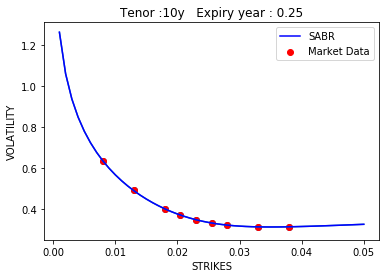

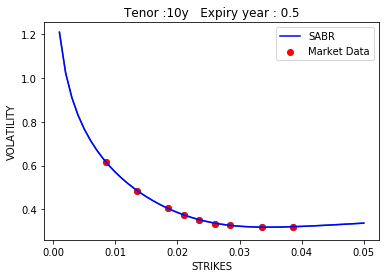

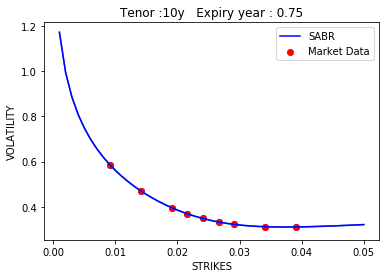

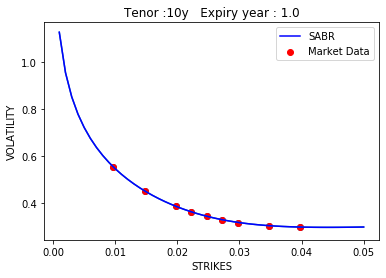

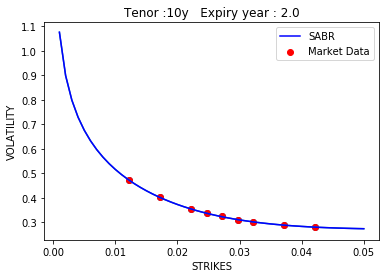

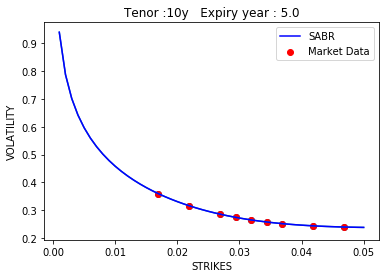

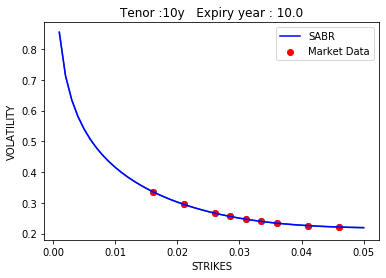

In [36]:
#############  Smiles for 10 years tenor  ######################

#import parameters, F and Expiry time
p10=numpy.zeros((7,15))
for i in range(14,21):
    p10[i-14]=parameters[i]
    

for j in range(0,7):
    #define the continuous functions SABR
    x10=numpy.linspace(0.001,0.05)
    y10=[]
    for i in range(len(x10)):
        y10.append(SABR(p10[j][0],p10[j][1],p10[j][2],p10[j][3],p10[j][4],x10[i],p10[j][5]))
        
    #Import the market data to compare
    K10=p10[j][4]
    e10=[K10-0.015,K10-0.01,K10-0.005,K10-0.0025,K10,K10+0.0025,K10+0.005,K10+0.01,K10+0.015]
    f10=[p10[j][6],p10[j][7],p10[j][8],p10[j][9],p10[j][10],p10[j][11],p10[j][12],p10[j][13],p10[j][14]]
    
    #plot the function SABR + Market data
    fig,ax10= plt.subplots()
    ax10.plot(x10,y10)
    ax10 = plt.scatter(e10,f10)
    
    # Add title and axis names
    plt.title('Tenor :'+str(10)+'y   Expiry year : '+str(p10[j][5]))
    plt.xlabel('STRIKES')
    plt.ylabel('VOLATILITY')
    plt.plot(x10, y10, "blue", label="SABR")
    plt.scatter(e10,f10,color='r',label="Market Data")
    plt.legend()
    plt.show()

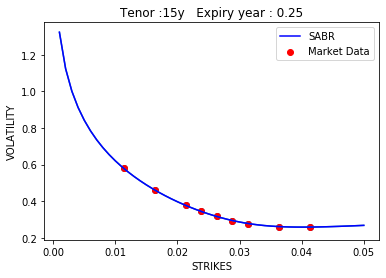

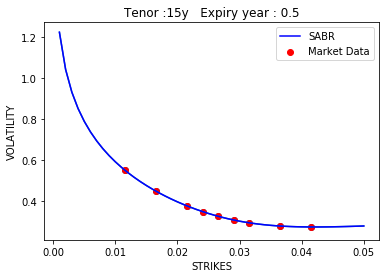

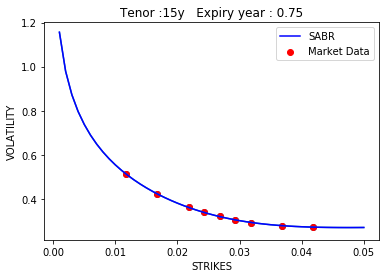

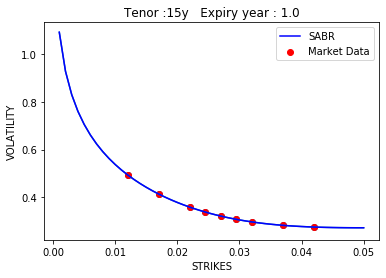

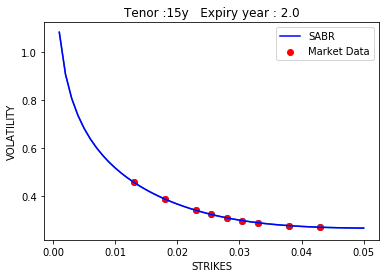

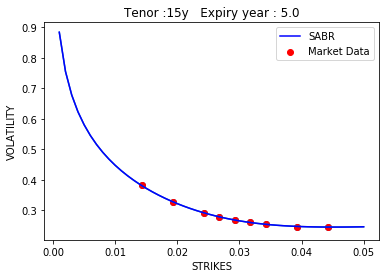

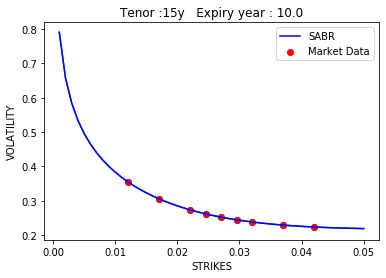

In [35]:
#############  Smiles for 15 years tenor  ######################

#import parameters, F and Expiry time
p15=numpy.zeros((7,15))
for i in range(21,28):
    p15[i-21]=parameters[i]
    

for j in range(0,7):
    #define the continuous functions SABR
    x15=numpy.linspace(0.001,0.05)
    y15=[]
    for i in range(len(x15)):
        y15.append(SABR(p15[j][0],p15[j][1],p15[j][2],p15[j][3],p15[j][4],x15[i],p15[j][5]))
        
    #Import the market data to compare
    K15=p15[j][4]
    e15=[K15-0.015,K15-0.01,K15-0.005,K15-0.0025,K15,K15+0.0025,K15+0.005,K15+0.01,K15+0.015]
    f15=[p15[j][6],p15[j][7],p15[j][8],p15[j][9],p15[j][10],p15[j][11],p15[j][12],p15[j][13],p15[j][14]]
    
    #plot the function SABR + Market data
    fig,ax15= plt.subplots()
    ax15.plot(x15,y15)
    ax15 = plt.scatter(e15,f15)
    
    # Add title and axis names
    plt.title('Tenor :'+str(15)+'y   Expiry year : '+str(p15[j][5]))
    plt.xlabel('STRIKES')
    plt.ylabel('VOLATILITY')
    plt.plot(x15, y15, "blue", label="SABR")
    plt.scatter(e15,f15,color='r',label="Market Data")
    plt.legend()
    plt.show()

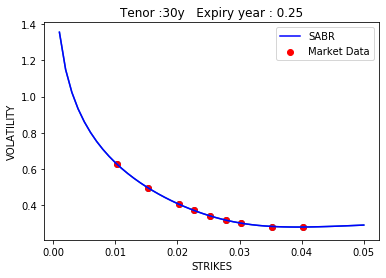

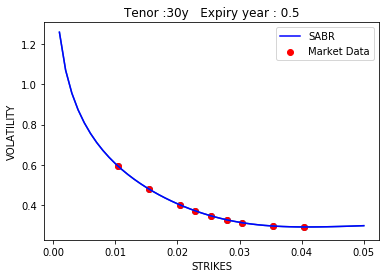

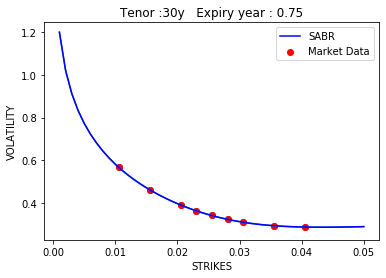

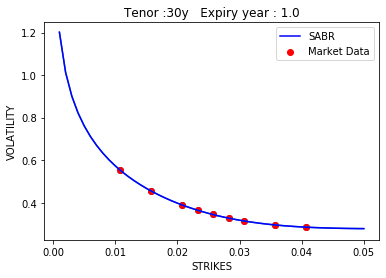

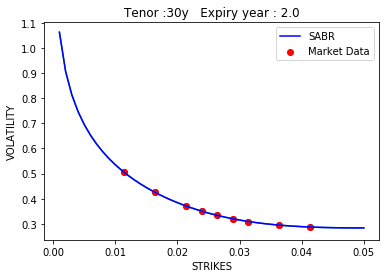

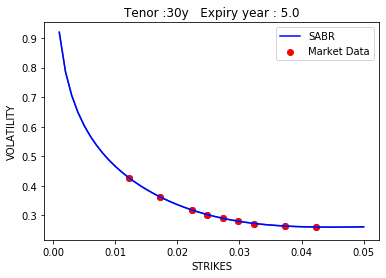

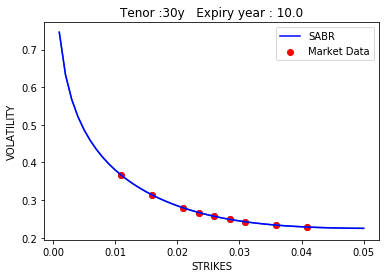

In [38]:
#############  Smiles for 30 years tenor  ######################

#import parameters, F and Expiry time
p30=numpy.zeros((7,15))
for i in range(28,35):
    p30[i-28]=parameters[i]
    

for j in range(0,7):
    #define the continuous functions SABR
    x30=numpy.linspace(0.001,0.05)
    y30=[]
    for i in range(len(x30)):
        y30.append(SABR(p30[j][0],p30[j][1],p30[j][2],p30[j][3],p30[j][4],x30[i],p30[j][5]))
        
    #Import the market data to compare
    K30=p30[j][4]
    e30=[K30-0.015,K30-0.01,K30-0.005,K30-0.0025,K30,K30+0.0025,K30+0.005,K30+0.01,K30+0.015]
    f30=[p30[j][6],p30[j][7],p30[j][8],p30[j][9],p30[j][10],p30[j][11],p30[j][12],p30[j][13],p30[j][14]]
    
    #plot the function SABR + Market data
    fig,ax30= plt.subplots()
    ax30.plot(x30,y30)
    ax30 = plt.scatter(e30,f30)
    
    # Add title and axis names
    plt.title('Tenor :'+str(30)+'y   Expiry year : '+str(p30[j][5]))
    plt.xlabel('STRIKES')
    plt.ylabel('VOLATILITY')
    plt.plot(x30, y30, "blue", label="SABR")
    plt.scatter(e30,f30,color='r',label="Market Data")
    plt.legend()
    plt.show()